In [53]:
#
# conda install -c https://conda.anaconda.org/anaconda ipywidgets
# conda install -c https://conda.binstar.org/matthewharrison midas
#
from midas.rectgrid import *
import ipywidgets
%pylab inline
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [54]:
sgrid=supergrid(file='ocean_hgrid.nc')
grid=quadmesh(supergrid=sgrid)

grid.D=nc.Dataset('ocean_topog.nc').variables['depth'][:]
grid.wet[grid.D>0.]=1.0
grid.wet[grid.D==0.]=0.0

In [65]:
def shade_depth(ax=plt,j=None):
  ax.pcolormesh(grid.x_T_bounds,grid.y_T_bounds,np.ma.masked_where(grid.wet==0,grid.D),\
               cmap=plt.cm.spectral,vmin=100,vmax=5000)
  ax.contour(grid.x_T,grid.y_T,grid.wet,[0.5,0.5],colors='r',linewidths=2.0)
  if j is not None:
    plt.plot(grid.x_T[j,:],grid.y_T[j,:],linewidth=2.0,alpha=0.8,color='w')
  ax.grid()


In [70]:
def plot_depth_jsec(j):
  fig=plt.figure(1,figsize=(10,4))
  ax1=fig.add_subplot(121)
  ax2=fig.add_subplot(122)
  shade_depth(ax2,j=j)
  ax1.plot(grid.x_T[j,:],sq(-grid.D[j,:]))
  ax1.set_xlabel('Geographic longitude at jrow')
  ax1.set_ylabel('depth from surface')
  ax1.set_ylim(-6500,0)
  ax1.set_xlim(215,250)
  ax1.set_title('CCS1 7km')

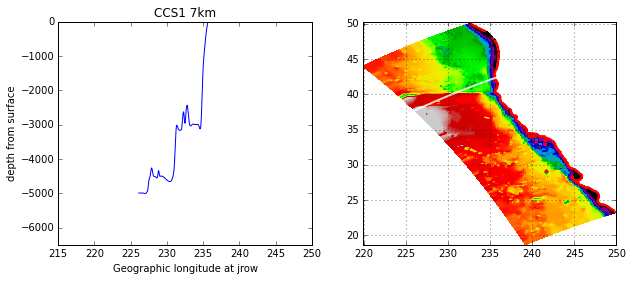

In [71]:
ipywidgets.interact(plot_depth_jsec, j=(0,grid.jm-1,1));